# Census Income Project

# The prediction task is to determine whether a person makes over $50K a year.

age: continuous.

workclas: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

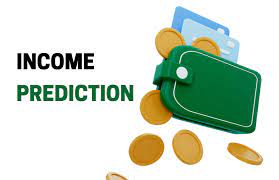

In [1]:
# Importing some neccessary liabraries which will help us to understand and visualize data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'E:\Data Science Certificates\Evaluation project\Census Income Project\census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

We have huge data available as we can see we have 32560 rows and 15 columns

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:

df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
12431,40,Private,110028,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
24660,20,Private,305446,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,30,United-States,<=50K
19898,70,Private,315868,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
22062,54,Private,53833,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
10784,45,Private,242994,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,52,United-States,<=50K


Just checking 5 random sample

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No missing values which is good sign as we dont have to impute any Data from our end

In [9]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Looking at the above uniqueness count most unique data is present in "Fnlwgt" and least in Sex and Income

In [26]:
# As we have huge data set we should check for duplicate rows in DataFrame

duplicate=df[df.duplicated()]
len(duplicate)

24

In [27]:
# We have 24 duplicate row and it is better to drop them

df.drop_duplicates(inplace=True)
df.shape

(32536, 15)

In [28]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [31]:
#We haev multiple object columns presetn in dataset. Lets covert them  in to that int

# Handling Objest using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

for i in list:
    df[i]=le.fit_transform(df[i].astype(str))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   Education_num   32536 non-null  int64
 5   Marital_status  32536 non-null  int32
 6   Occupation      32536 non-null  int32
 7   Relationship    32536 non-null  int32
 8   Race            32536 non-null  int32
 9   Sex             32536 non-null  int32
 10  Capital_gain    32536 non-null  int64
 11  Capital_loss    32536 non-null  int64
 12  Hours_per_week  32536 non-null  int64
 13  Native_country  32536 non-null  int32
 14  Income          32536 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.9 MB


we can see now our data in coverted and only two type of data present on data int32 and int64. 
We can see that total memory usage of data in 2.9MB
no missing values present as count is 32536 for all column

In [34]:

# Checking for blank space in data
df.loc[df['Age']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


No spaces are present in dataset

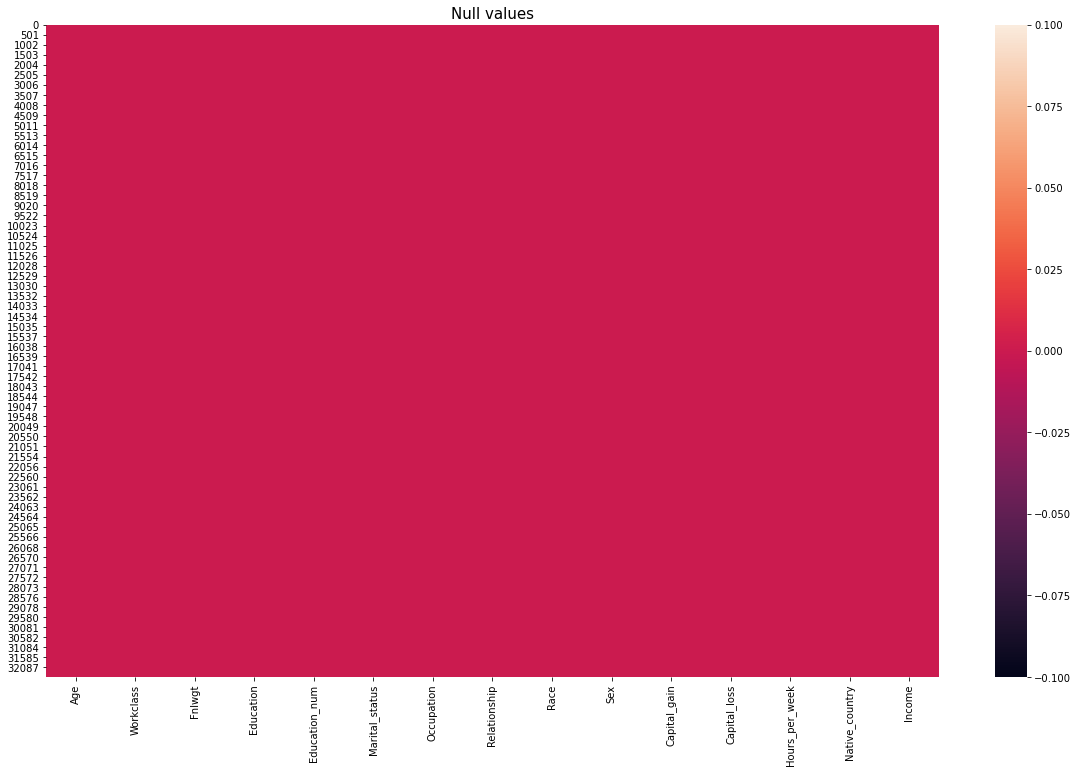

In [35]:
plt.figure(figsize=(20,12))
plt.title("Null values",fontsize=15)
sns.heatmap(df.isnull());

Plotting null values on heatmap and as we know it is not present

In [96]:
# Getting original dataset just to visualize catagorical data

dfv=pd.read_csv(r'E:\Data Science Certificates\Evaluation project\Census Income Project\census_income.csv')

<AxesSubplot:>

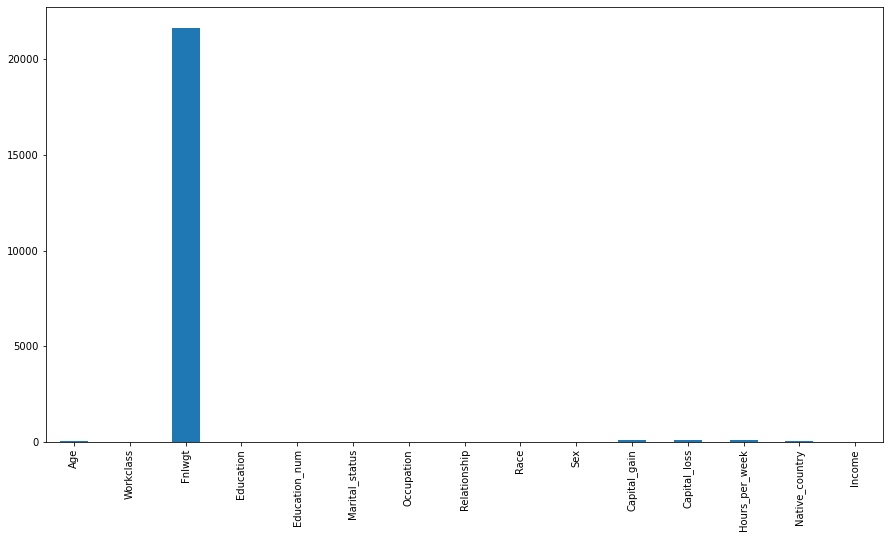

In [97]:
sns.countplot(x='Attrition',data=df)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

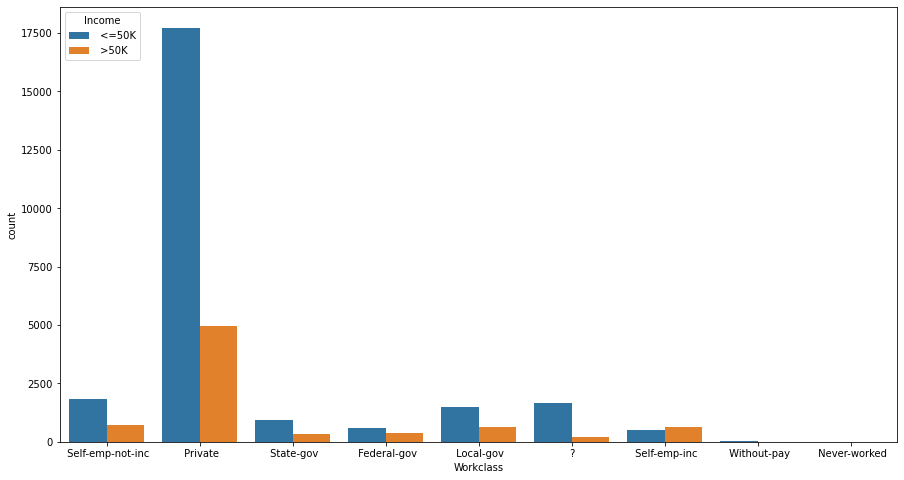

In [108]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Workclass',data=dfv,hue='Income')

We can look at above graph and see that private sector has highest employee and also count is high in this sectors who earns more that 50K
Lowest employee are in state and federal gov sector


<AxesSubplot:xlabel='Income', ylabel='count'>

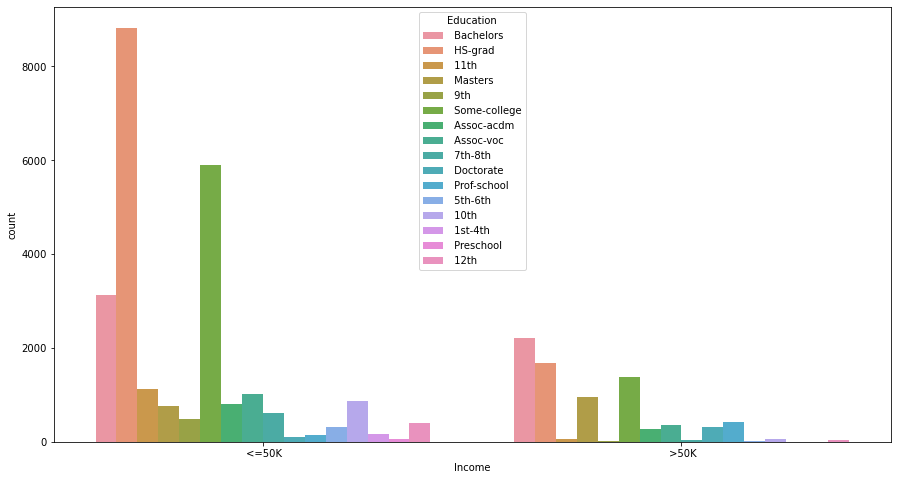

In [109]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Income',data=dfv,hue='Education')

In Above graph

Those whose education is HS-grad they are having high count and most of them are earning leas than or equal to 50K
Most of members are educated more that 12th as we can see count is less for 12 th
those who did some college has good earnings than other

<AxesSubplot:xlabel='Income', ylabel='count'>

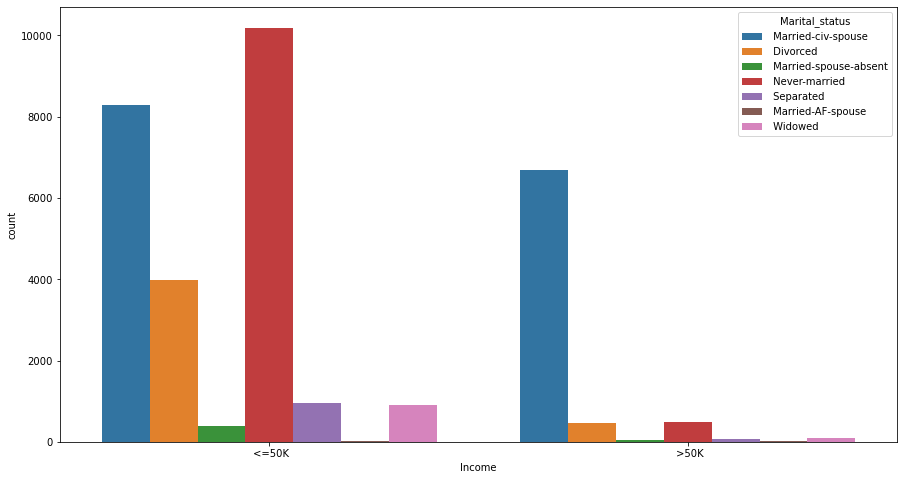

In [111]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Income',data=dfv,hue='Marital_status')

most of married members are earning more that 50K
who never married they have mejority counts when we think about who earn less than or equal to 50K


<AxesSubplot:xlabel='Income', ylabel='count'>

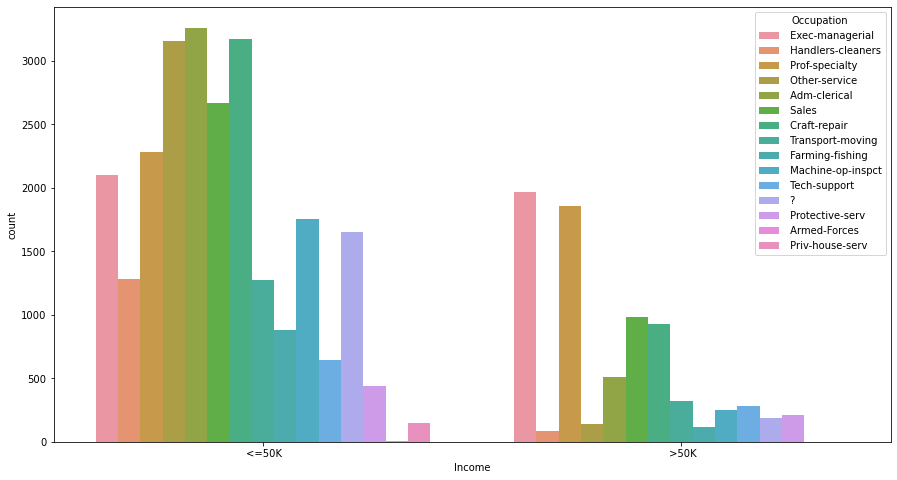

In [112]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Income',data=dfv,hue='Occupation')

Adm-clerical and other services has high count whoc earns less that 50K
Armed Forces are earning good as we can see they are high numbers when we observe >50K
Prive-house are those who are earning less

<AxesSubplot:xlabel='Income', ylabel='count'>

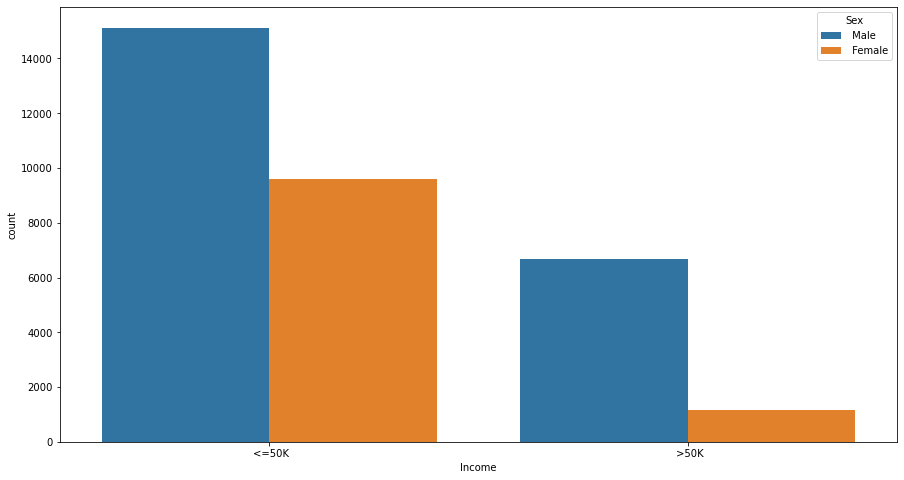

In [115]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Income',data=dfv,hue='Sex')

Most females income is less that or equal to 50


<AxesSubplot:xlabel='Sex', ylabel='count'>

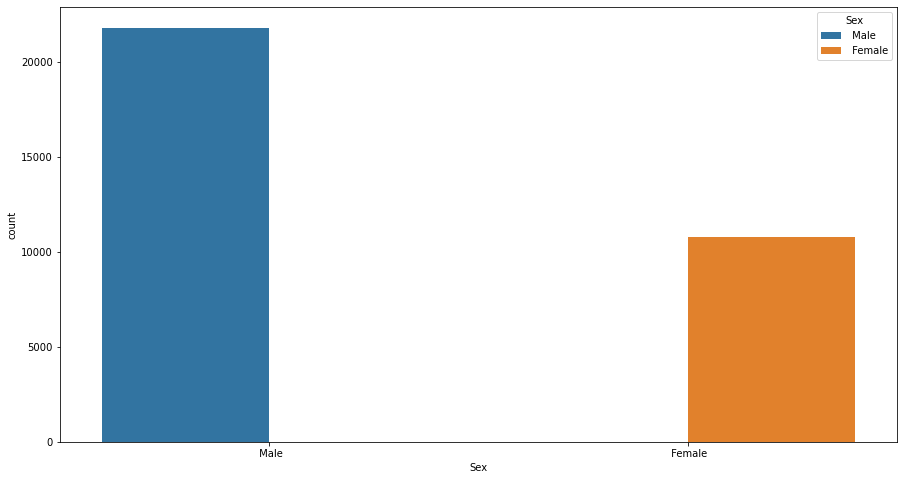

In [117]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Sex',data=dfv,hue='Sex')

But we can also see that we have less data for females.

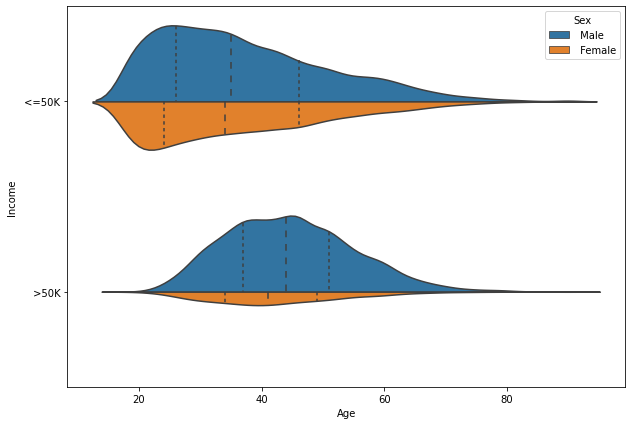

In [118]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Age", y="Income", hue="Sex", data=dfv, 
                split=True, scale="count", inner="quartile")
plt.show()

Females are again less when we see group of invome who are having >50

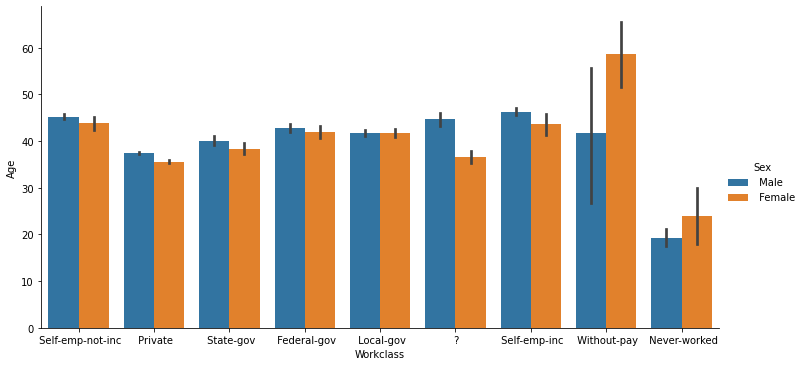

In [128]:

sns.catplot(data=dfv, x="Workclass", y="Age", kind="bar",hue="Sex",height=5, aspect=2)

Feamles are High who who are without pay
males are lowest who never worked
Local govenment work has equality in gender

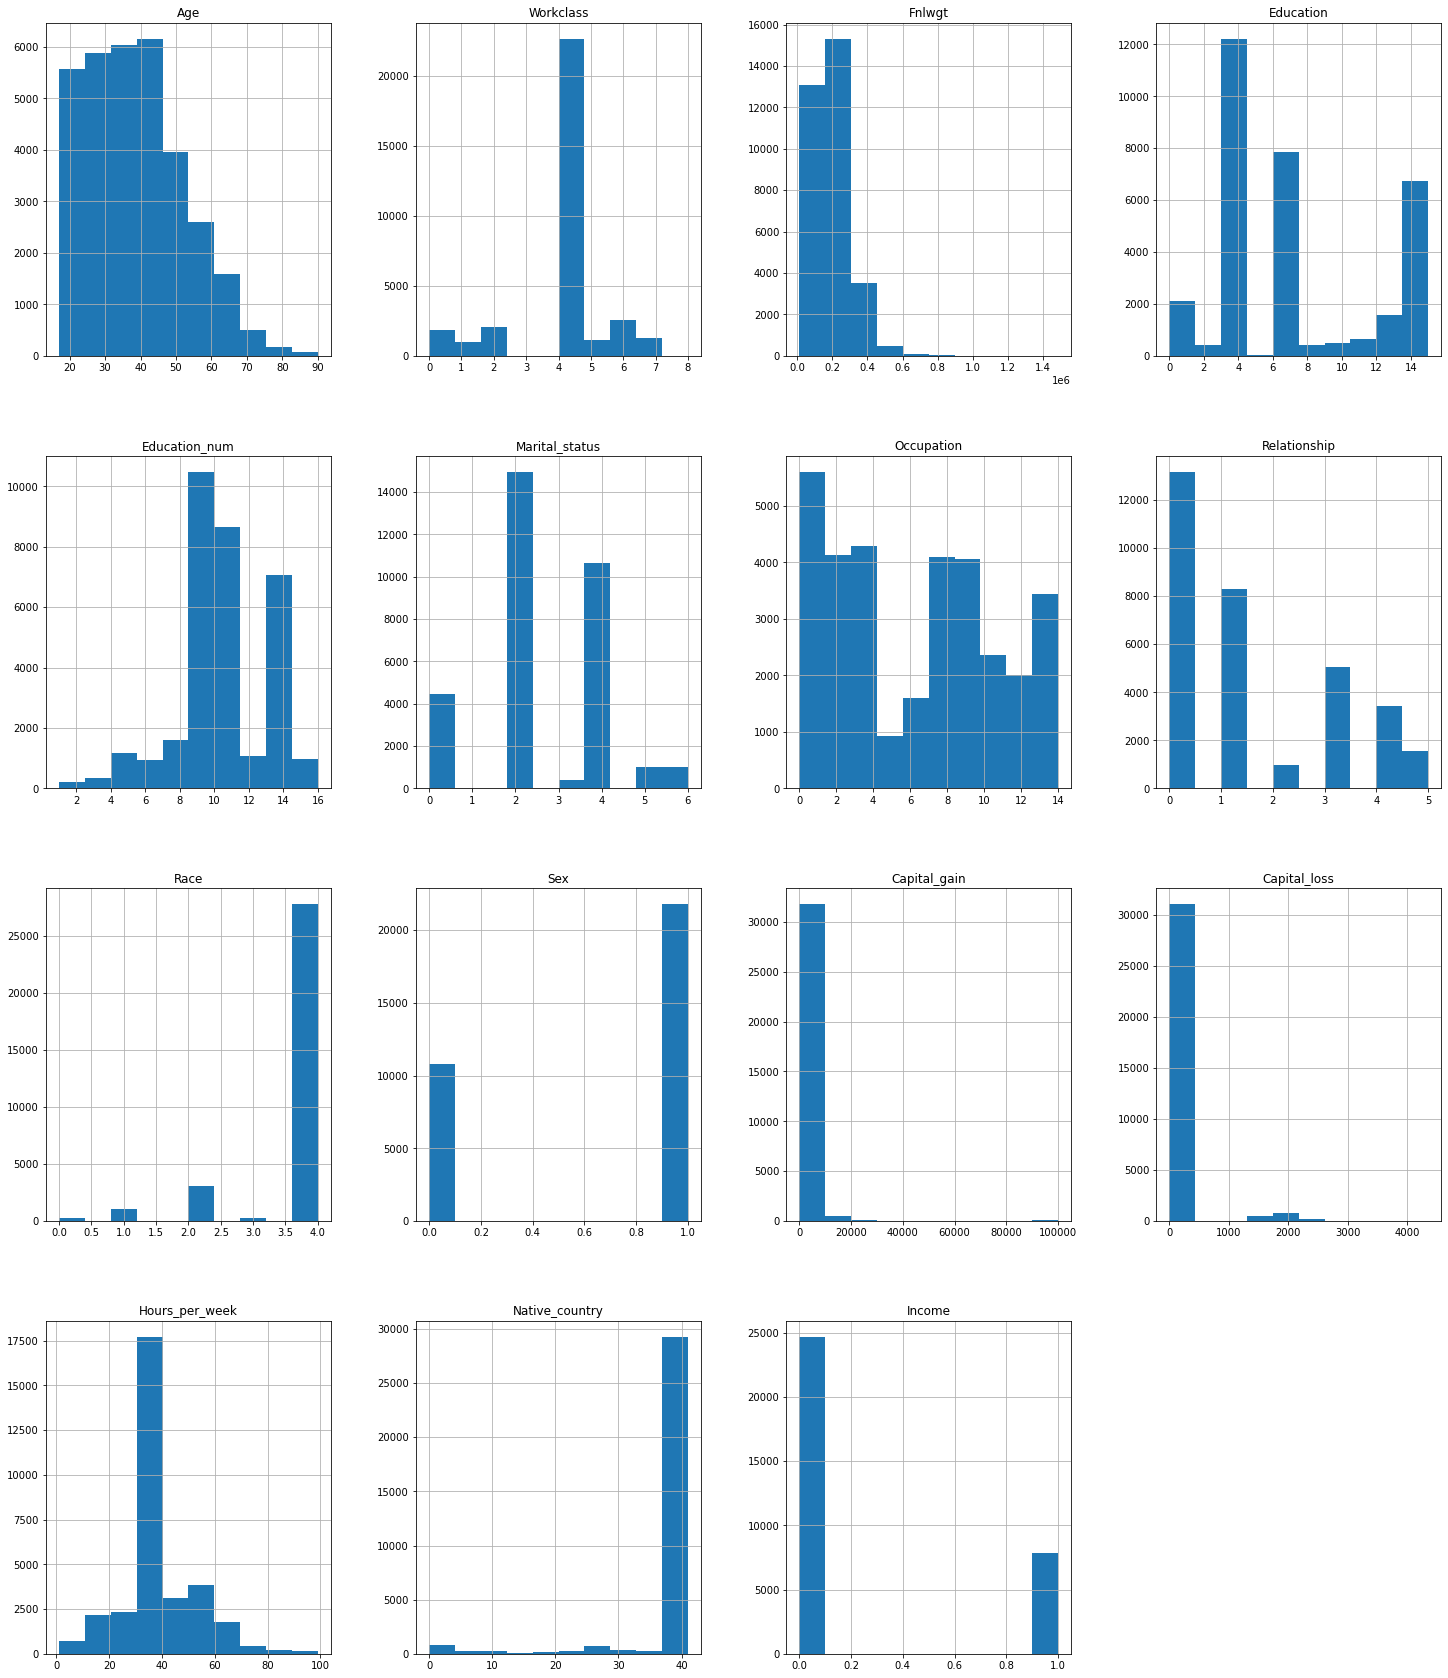

In [129]:
df.hist(figsize=(25,30))
plt.show()


We have already observed trends of almost all columns looking at them in one plot how they are dictributed and all.

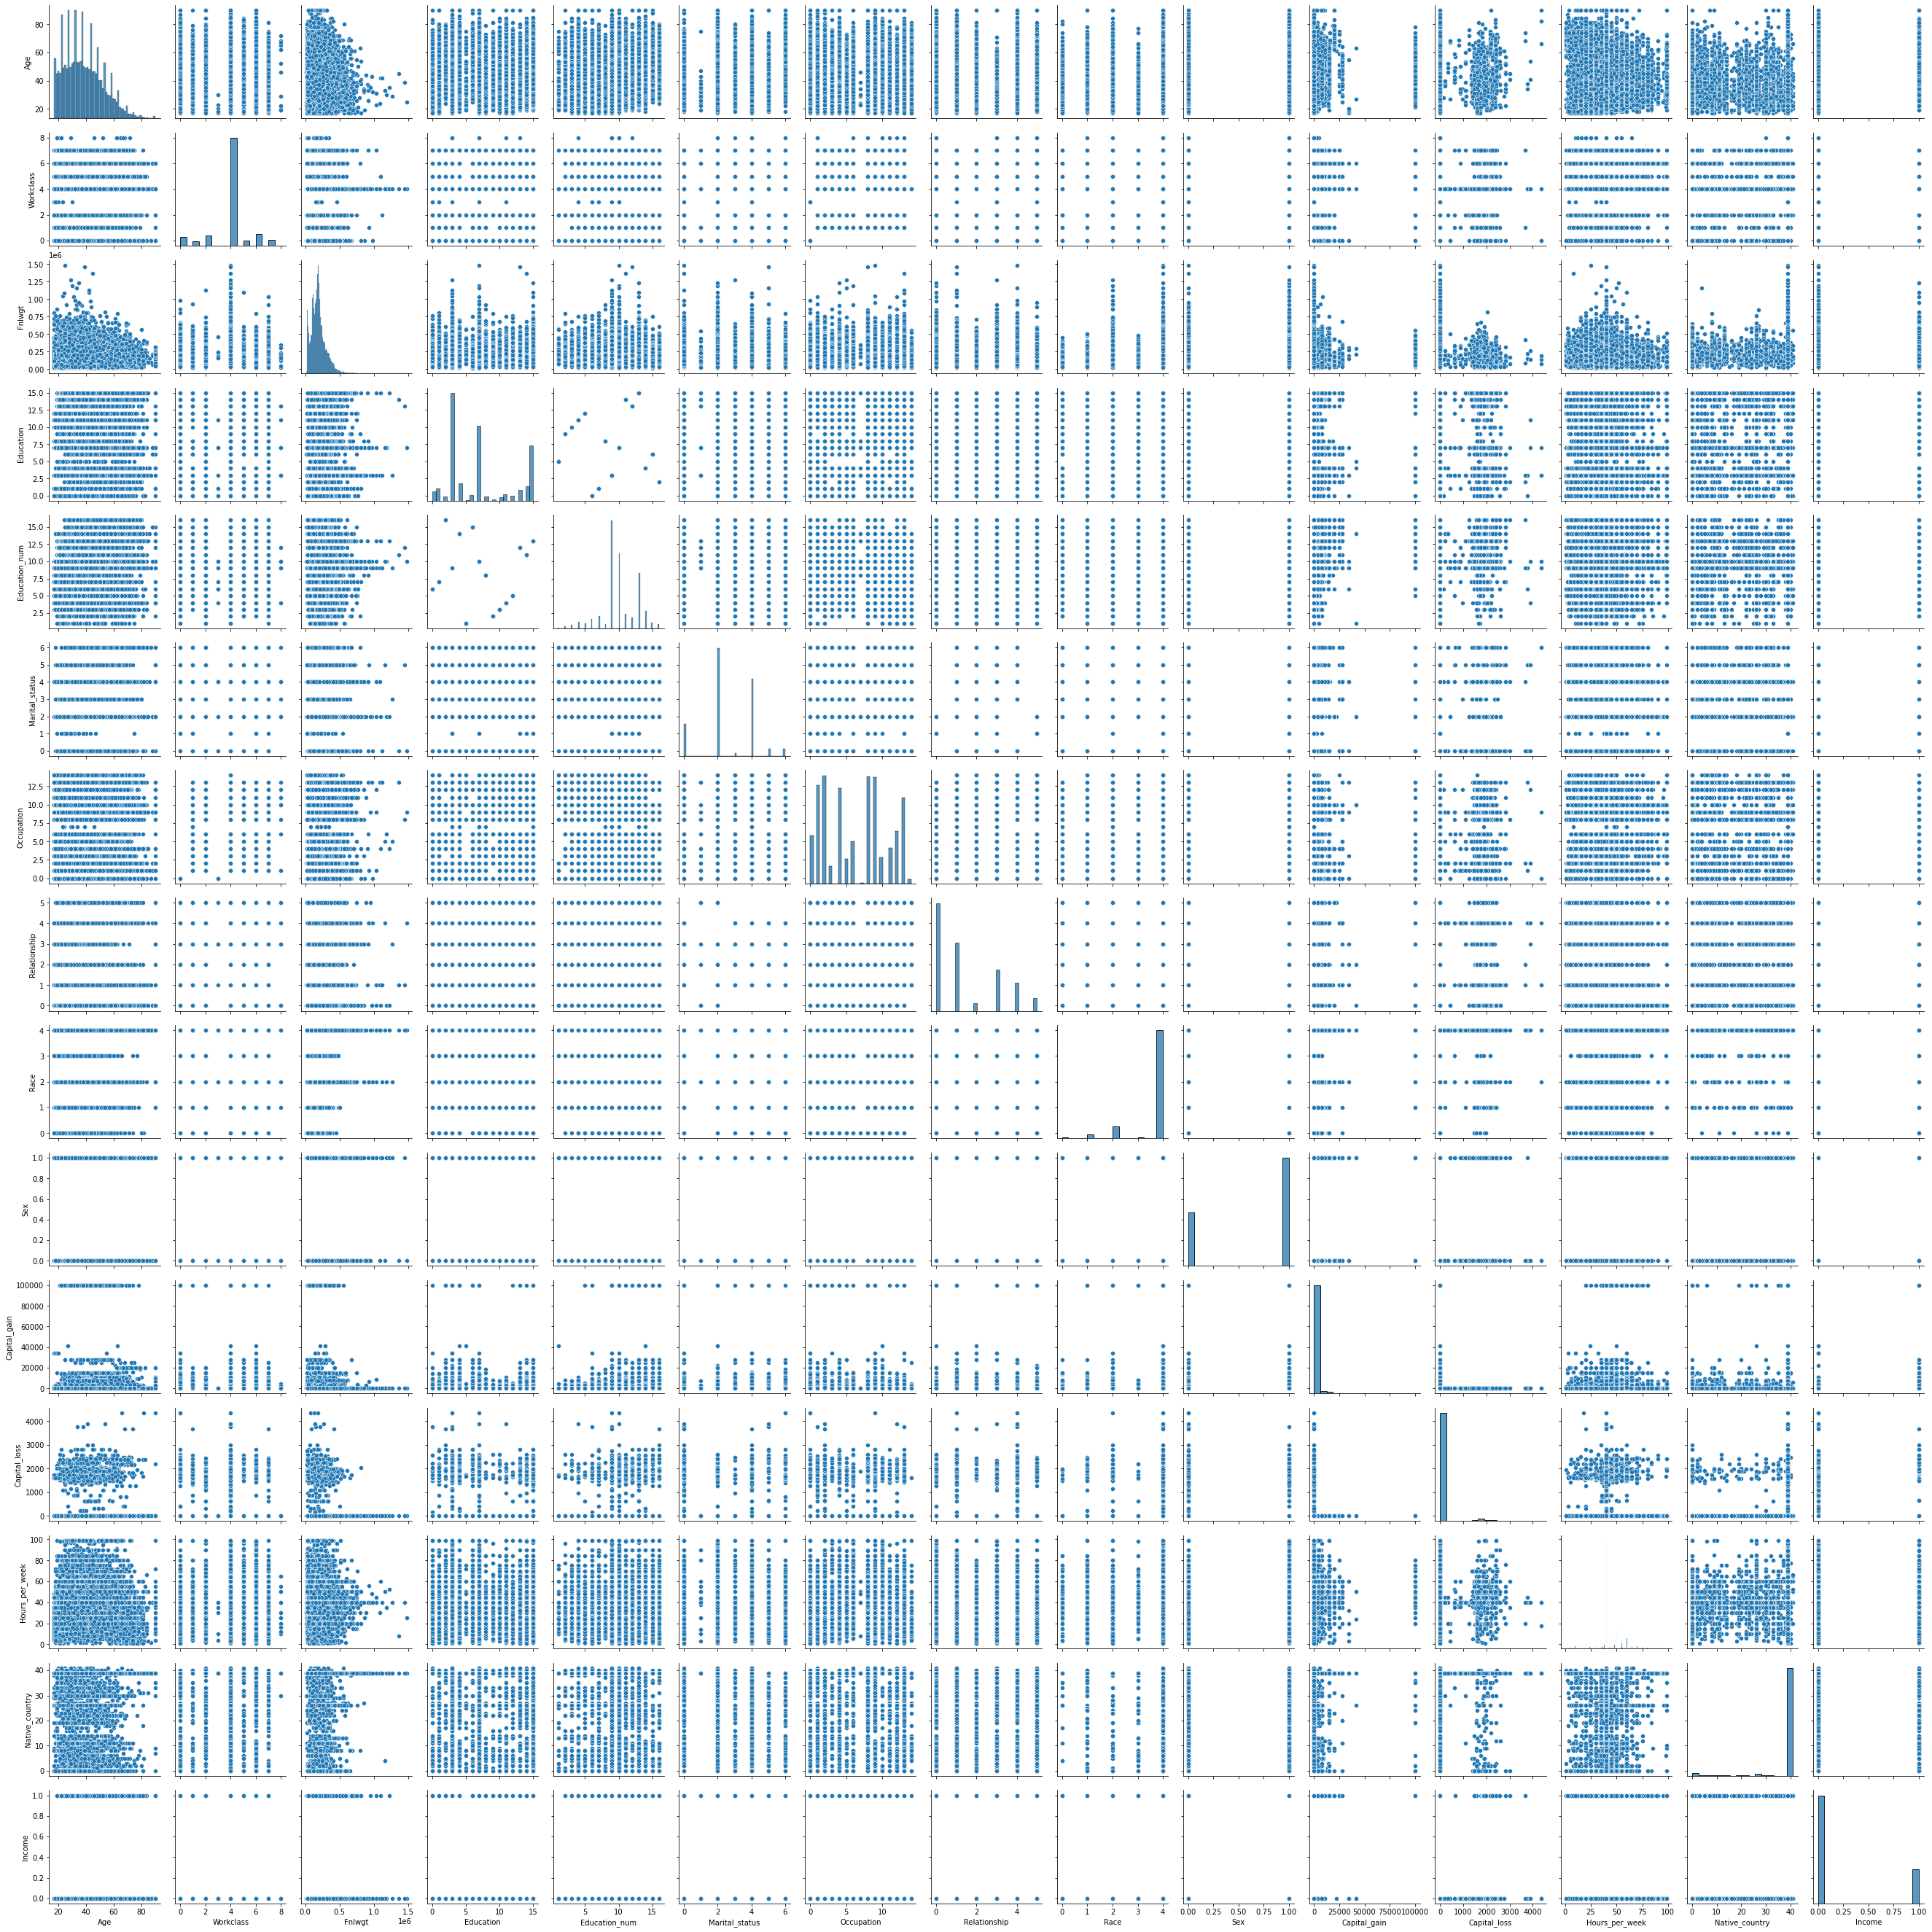

In [137]:
sns.pairplot(df)

In [138]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003781,-0.076448,0.011896,0.036224,-0.266142,-0.049569,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234039
Workclass,0.003781,1.000000,-0.016532,0.004779,0.052099,-0.064828,0.277736,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.007697,0.051706
Fnlwgt,-0.076448,-0.016532,1.000000,-0.003170,-0.043353,0.028154,0.002435,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.051866,-0.009521
Education,0.011896,0.004779,-0.003170,1.000000,0.411289,-0.015609,-0.128136,-0.056115,0.013295,0.004475,0.024102,0.020242,0.061529,-0.037674,0.139785
Education_num,0.036224,0.052099,-0.043353,0.411289,1.000000,-0.069196,-0.283062,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.050127,0.335299
Marital_status,-0.266142,-0.064828,0.028154,-0.015609,-0.069196,1.000000,0.007942,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023414,-0.199187
Occupation,-0.049569,0.277736,0.002435,-0.128136,-0.283062,0.007942,1.000000,-0.045267,-0.017959,0.129584,-0.037840,-0.024034,0.030500,-0.046109,-0.092552
Relationship,-0.263744,-0.090421,0.008859,-0.056115,-0.094424,0.185542,-0.045267,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.005634,-0.250955
Race,0.029116,0.049717,-0.021484,0.013295,0.031998,-0.067942,-0.017959,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.137847,0.071855
Sex,0.088708,0.095960,0.027113,0.004475,0.012181,-0.129425,0.129584,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.008262,0.215984


looks like most correalted values are hours_per_week and age

<AxesSubplot:>

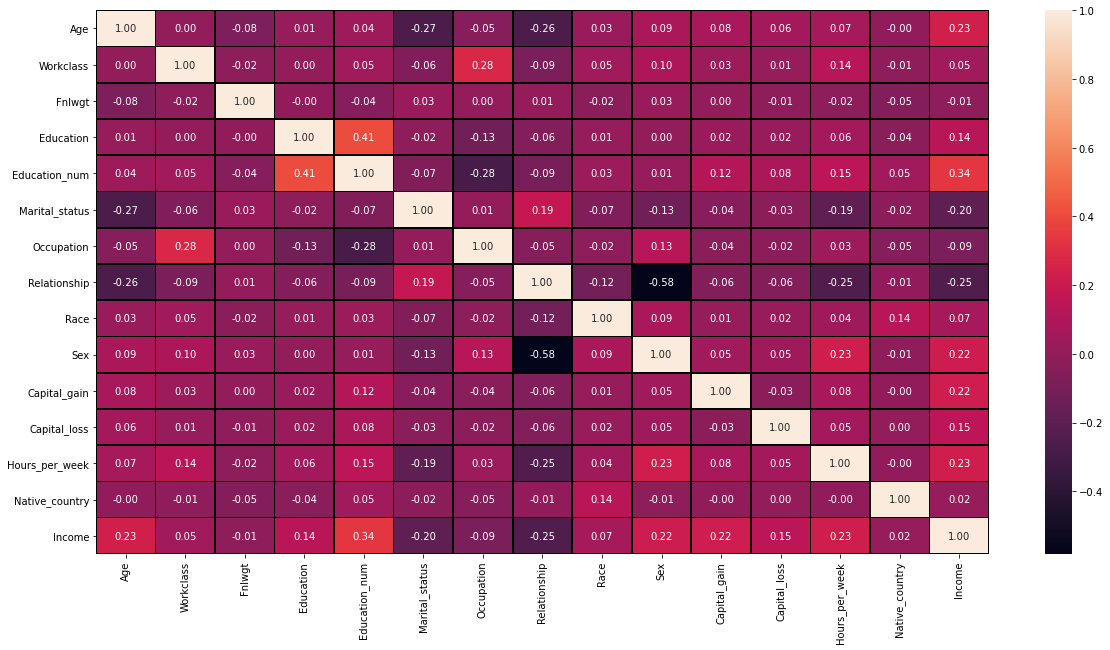

In [139]:
# Plotting all correlation values on heatma[]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.6,linecolor="black", fmt='.2f')

Education number is also important columns 

In [141]:
df.corr()['Income'].sort_values()

Relationship     -0.250955
Marital_status   -0.199187
Occupation       -0.092552
Fnlwgt           -0.009521
Native_country    0.015623
Workclass         0.051706
Race              0.071855
Education         0.139785
Capital_loss      0.150498
Sex               0.215984
Capital_gain      0.223340
Hours_per_week    0.229659
Age               0.234039
Education_num     0.335299
Income            1.000000
Name: Income, dtype: float64

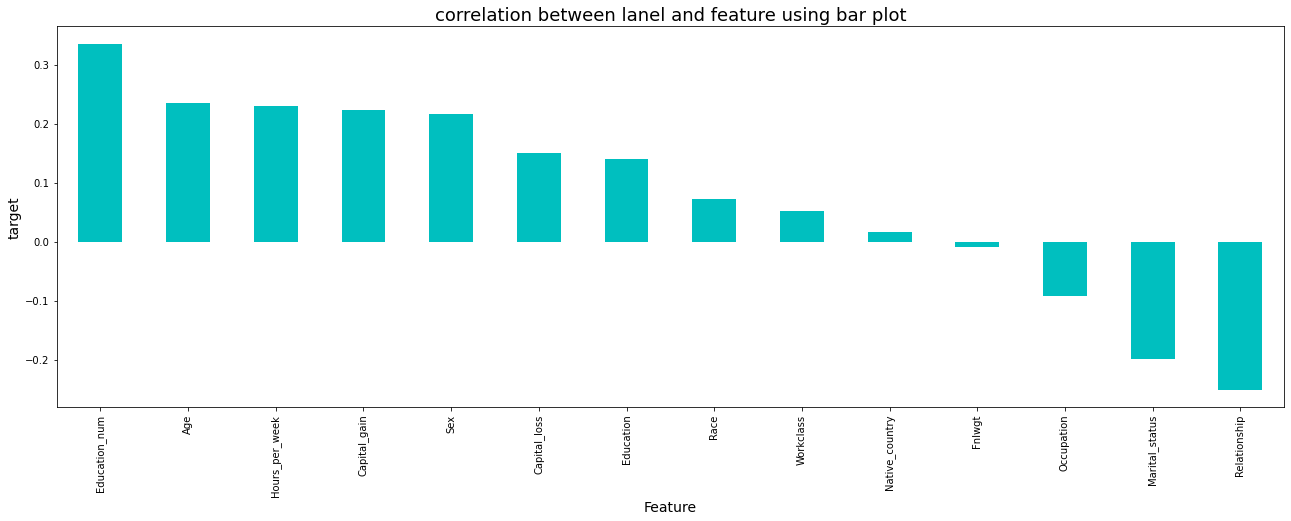

In [142]:
# Ploting correaltion with target 

plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [143]:
# We can see that Native_country and Fnlwge are having very less correlation so I will drop both

df.drop('Fnlwgt',axis=1,inplace=True)
df.drop('Native_country',axis=1,inplace=True)

In [144]:
df.shape

(32536, 13)

In [147]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.0,90.0
Workclass,32536.0,3.868638,1.456363,0.0,4.0,4.0,4.0,8.0
Education,32536.0,7.071890,4.827642,0.0,3.0,7.0,12.0,15.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.0,16.0
Marital_status,32536.0,2.611384,1.506304,0.0,2.0,2.0,4.0,6.0
Occupation,32536.0,6.332155,4.259204,0.0,2.0,6.0,9.0,14.0
Relationship,32536.0,1.446552,1.607087,0.0,0.0,1.0,3.0,5.0
Race,32536.0,3.665816,0.848858,0.0,4.0,4.0,4.0,4.0
Sex,32536.0,0.669228,0.470498,0.0,0.0,1.0,1.0,1.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.0,99999.0


So In above table count shows us numnber of row
Mean shows us mean for each column
25% percentile is data covered withing 25 percentile
75% data covered upto 75% percentile 
Max column is showing maximum value in that perticuler column

# Outliers review 

<function matplotlib.pyplot.show(close=None, block=None)>

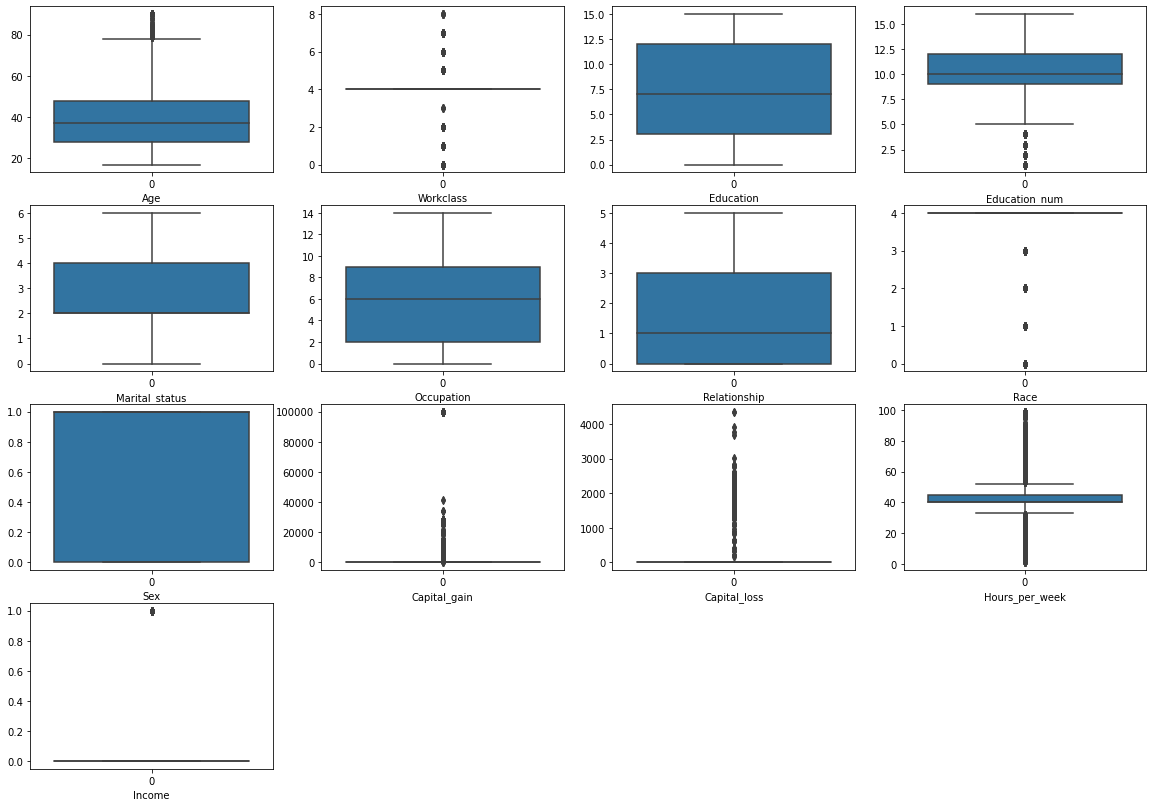

In [148]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=13:
        plt.subplot(7,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

In [155]:
#We have outliers presetn in dataset lets treat them

from scipy.stats import zscore
zscore=zscore(df)
zabs=np.abs(zscore)

z=df[(zabs<3).all(axis=1)]

In [156]:
z.shape

(28893, 13)

In [157]:
df.shape

(32536, 13)

In [158]:
loss=(32536-28893)/32536*100
loss

11.196828128841899

Considering we have lots of data available to train models I would prefer to go with this percentage and remove outliers

In [159]:
dropindex=df.index.difference(z.index)
dropindex

Int64Index([    9,    10,    13,    14,    22,    26,    27,    31,    51,
               76,
            ...
            32468, 32475, 32485, 32493, 32517, 32524, 32530, 32532, 32550,
            32552],
           dtype='int64', length=3643)

In [160]:
df.drop(dropindex,inplace=True)
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,15,13,2,9,0,4,1,0,0,13,0
1,38,4,3,9,0,11,1,4,1,0,0,40,0
2,53,4,1,7,2,11,0,2,1,0,0,40,0
3,28,4,15,13,2,2,5,2,0,0,0,40,0
4,37,4,4,14,2,9,5,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,13,12,2,5,5,4,0,0,0,38,0
32556,40,4,3,9,2,12,0,4,1,0,0,40,1
32557,58,4,3,9,6,1,4,4,0,0,0,40,0
32558,22,4,3,9,4,1,3,4,1,0,0,20,0


<function matplotlib.pyplot.show(close=None, block=None)>

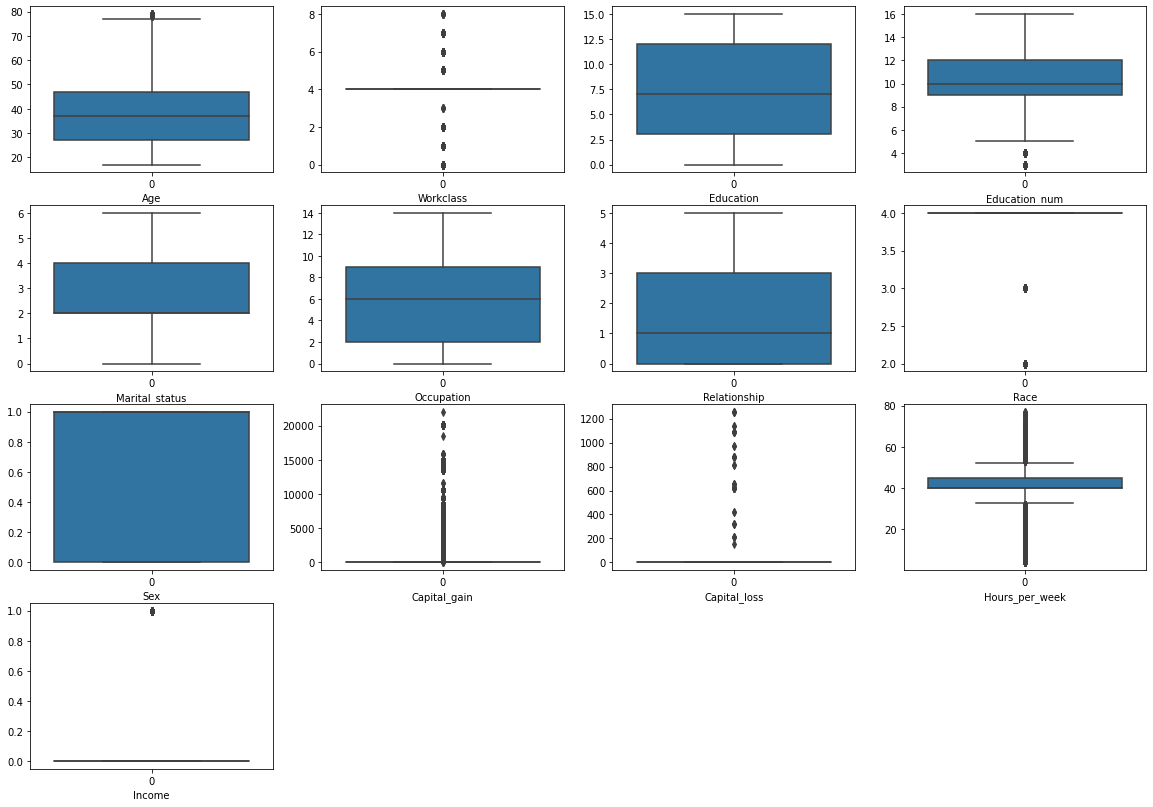

In [161]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=28:
        plt.subplot(7,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

Looks better now

# Skewness of data

In [162]:
df.skew()

Age                0.488115
Workclass         -0.749758
Education          0.574451
Education_num     -0.166294
Marital_status    -0.047123
Occupation         0.089568
Relationship       0.749435
Race              -2.545355
Sex               -0.684303
Capital_gain       4.938534
Capital_loss      29.667860
Hours_per_week    -0.357914
Income             1.326455
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

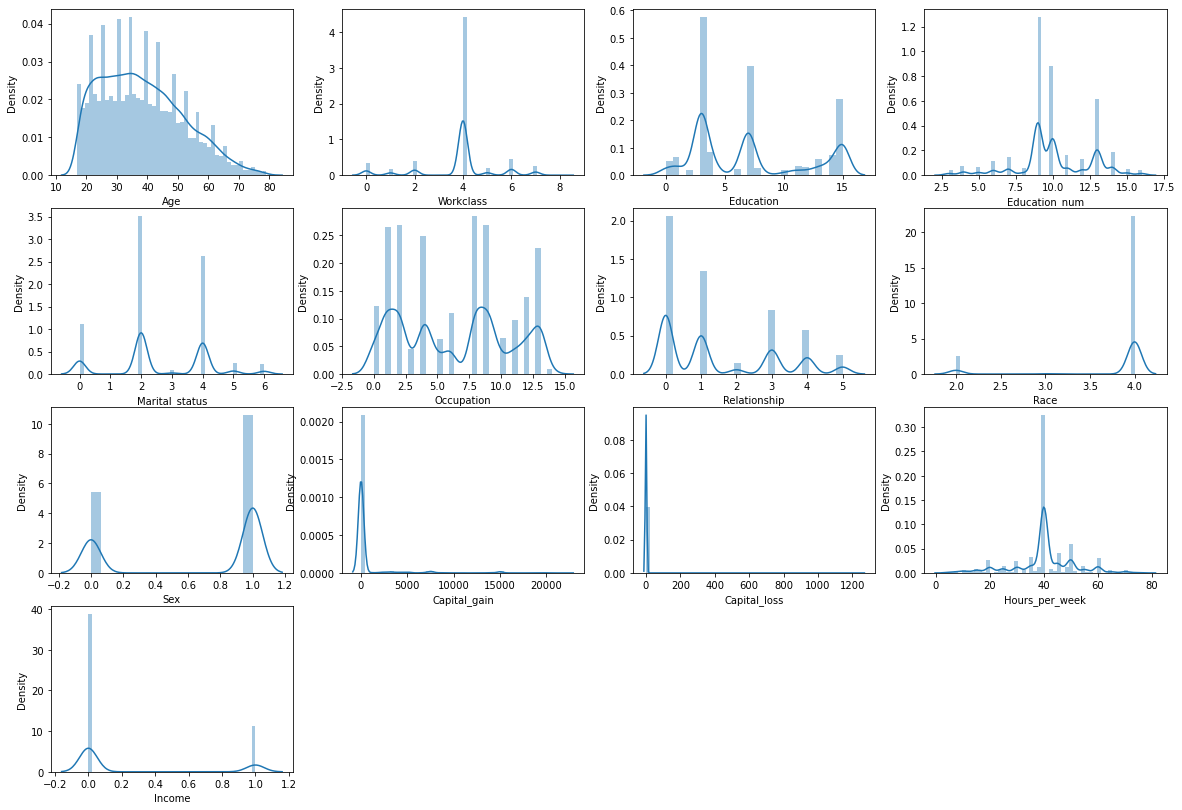

In [163]:
# Ploting on graph to better visualization

plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=28:
        plt.subplot(7,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

We have very high skewed data preset as we can look at the capital gain,capital loss and race

# Defining x and Y

In [165]:
x = df.drop("Income", axis=1)
y = df["Income"]

In [166]:
x.shape

(28893, 12)

In [167]:

y.shape

(28893,)

# Removing Skewness using yeo-johnson method

In [168]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.9254675 ,  1.66394781,  1.4406438 , ..., -0.29713562,
        -0.03993269, -2.21771728],
       [ 0.12898472,  0.01766221, -0.78740324, ..., -0.29713562,
        -0.03993269, -0.03881892],
       [ 1.1001567 ,  0.01766221, -1.62645976, ..., -0.29713562,
        -0.03993269, -0.03881892],
       ...,
       [ 1.37433981,  0.01766221, -0.78740324, ..., -0.29713562,
        -0.03993269, -0.03881892],
       [-1.3317168 ,  0.01766221, -0.78740324, ..., -0.29713562,
        -0.03993269, -1.72341471],
       [ 1.04283305,  0.80690513, -0.78740324, ...,  3.36550369,
        -0.03993269, -0.03881892]])

In [169]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

In [170]:
Columnsname=['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week']

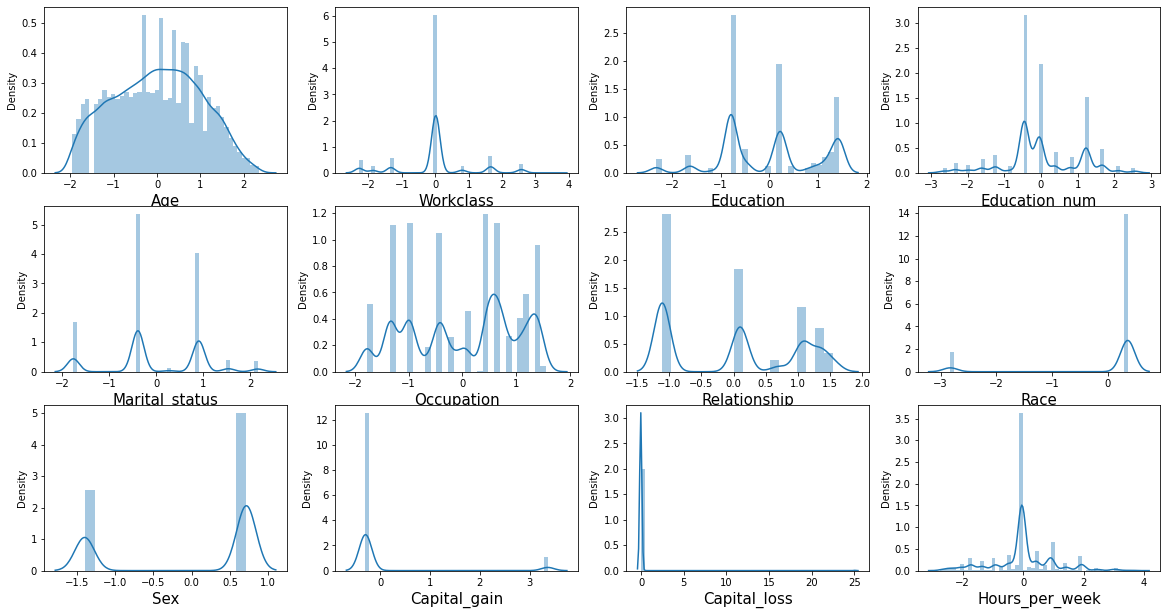

In [171]:
new_x=pd.DataFrame(data=x,columns=Columnsname)

plt.figure(figsize=(20,25),facecolor='white')

plotn=1

for col in new_x:
    if plotn<=12:
        plt.subplot(7,4,plotn)
        sns.distplot(new_x[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show() 


Okay we treated skewness as much as possible

# Checking balancing of target variabel

In [172]:
y.value_counts()

0    22431
1     6462
Name: Income, dtype: int64

We can see that class is not balance which can create bias while training model

# I will use SMOT to balance class

In [173]:
# WIll raise count of "1"


from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [174]:
y.value_counts()

1    22431
0    22431
Name: Income, dtype: int64

# As we can see now class is balanceed and we are good to go ahead

# Feature Scaling

In [175]:
from sklearn.preprocessing import StandardScaler




scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=Columnsname)
x.head()


,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.812453,1.658477,1.344773,0.982315,-0.300365,0.766978,-0.873161,0.316384,0.613869,-0.382314,-0.033164,-2.446193
1,-0.053958,-0.003208,-0.893143,-0.654630,-1.864232,1.160919,0.320004,0.316384,0.613869,-0.382314,-0.033164,-0.194389
2,1.002479,-0.003208,-1.735916,-1.421868,-0.300365,1.160919,-0.873161,-3.165569,0.613869,-0.382314,-0.033164,-0.194389
3,-0.963817,-0.003208,1.344773,0.982315,-0.300365,-1.012268,1.747103,-3.165569,-1.629725,-0.382314,-0.033164,-0.194389
4,-0.135669,-0.003208,-0.586717,1.409791,-0.300365,0.766978,1.747103,0.316384,-1.629725,-0.382314,-0.033164,-0.194389


As we can see we coverted data in one class which will help model to calculate exact values

# Lets train models now

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Finding best Random state

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.8965786247631784 on Random State: 20


We found our best random state 20 which is giving us highest accuracy upto 89 %

In [178]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=20)

In [179]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
EXT=ExtraTreesClassifier()
GB=GradientBoostingClassifier()

model=[LOGR,RFC,DTC,SV,KNN,EXT,GB]


for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("Confusion matrix :",confusion_matrix(y_test,predi))
    print("Classification report :", classification_report(y_test,predi,))
    print("Accuracy score :", accuracy_score(y_test,predi))
    print("*****************************************************************")

performance matrix of LogisticRegression(solver='liblinear') is:
Confusion matrix : [[3423 1096]
 [ 868 3586]]
Classification report :               precision    recall  f1-score   support

           0       0.80      0.76      0.78      4519
           1       0.77      0.81      0.79      4454

    accuracy                           0.78      8973
   macro avg       0.78      0.78      0.78      8973
weighted avg       0.78      0.78      0.78      8973

Accuracy score : 0.7811211412013819
*****************************************************************
performance matrix of RandomForestClassifier() is:
Confusion matrix : [[4009  510]
 [ 441 4013]]
Classification report :               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4519
           1       0.89      0.90      0.89      4454

    accuracy                           0.89      8973
   macro avg       0.89      0.89      0.89      8973
weighted avg       0.89      0.89      0.89

# Cross validation

In [180]:
from sklearn.model_selection import cross_val_score
j=[LOGR,RFC,DTC,SV,KNN,EXT,GB]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=5)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LogisticRegression(solver='liblinear') is
[0.76696757 0.77354285 0.7698395  0.77530094 0.77474365]
0.7720789007931309
0.0031864135204138513


Cross_Validation_score of RandomForestClassifier() is
[0.81745236 0.87328653 0.91607222 0.91629514 0.91462327]
0.8875459041711254
0.03870371719349767


Cross_Validation_score of DecisionTreeClassifier() is
[0.7662989  0.83985289 0.88542131 0.89010254 0.8838609 ]
0.8531073082525925
0.04705317275119754


Cross_Validation_score of SVC() is
[0.82090717 0.82213307 0.82501115 0.82445386 0.82958092]
0.8244172304897056
0.002985153629931027


Cross_Validation_score of KNeighborsClassifier() is
[0.8359523  0.84720829 0.85298707 0.85488185 0.84875167]
0.8479562380607917
0.00661150632946123


Cross_Validation_score of ExtraTreesClassifier() is
[0.83628664 0.87718712 0.9142889  0.91830138 0.91551494]
0.8923157941650782
0.03182581187975901


Cross_Validation_score of GradientBoostingClassifier() is
[0.8187897  0.85233478 0.86703076 0.

While comparing accurcy with cross validation score i found that ExtraTreesclassifier is working best
we can see accuracy score is equal to Cross validation score for this model with 89% accuracy

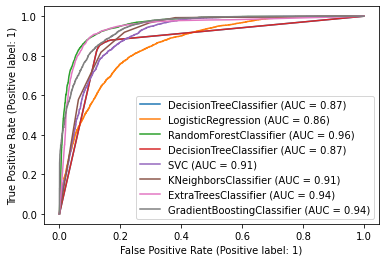

In [181]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,DTC,SV,KNN,EXT,GB]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

# Hypert parameter tunning for best model 

In [186]:
# Choosing Extra Trees Classifier

Parameters = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [20, 780, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]}
             

In [187]:
from sklearn.model_selection import GridSearchCV

GSCV = GridSearchCV(ExtraTreesClassifier(), Parameters, cv=5)

In [189]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [20, 780, 1000]})

In [190]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 20}

In [193]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=30, n_estimators=300, n_jobs=-2, random_state=20)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 89.80274155800736


Not much impact but we can save Final_model with 89 % accuracy

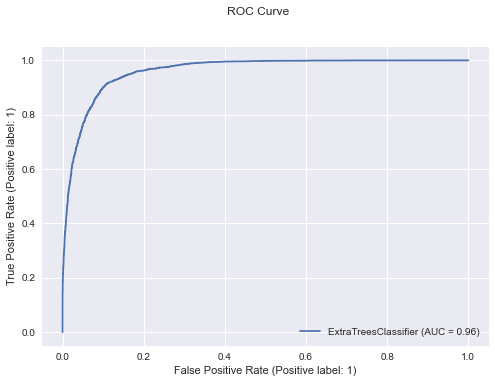

In [195]:
from sklearn import metrics
plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_Model, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

We got AUC 96% which is good

# Confusion Matrix

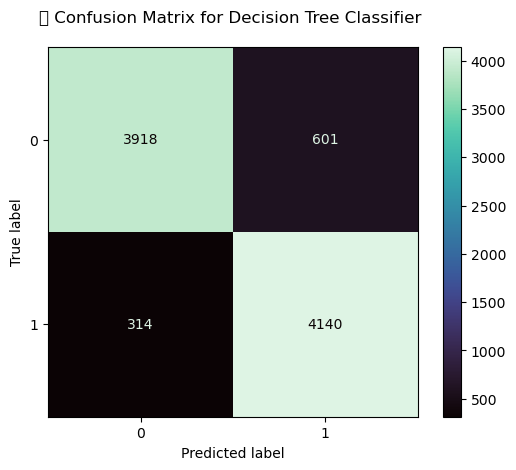

In [196]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

I can see that how many are correctly presicated and how much my model missed.

# Saving Final model

In [198]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_Model ,"Income_predict.pkl")

['Income_predict.pkl']

# Lets use model to predict again

In [199]:
# Loading the saved model
model=joblib.load("Income_predict.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, ..., 1, 1, 1])

In [200]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
8968,1,1
8969,1,1
8970,1,1
8971,1,1


Above we can see comparison between actual values and predicated values

# Thank You